In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
cd = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\DATA SCIENCE\ExcelR\Assignments\Problem statements - ExcelR\Random forest\Company_Data.csv')
cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
cd.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


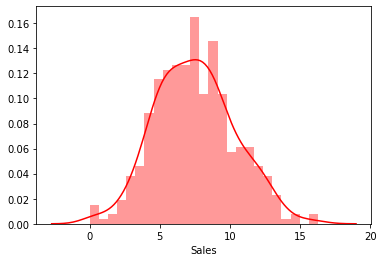

In [4]:
sns.distplot(cd['Sales'],bins=25,color='red')

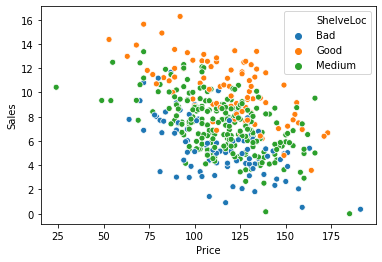

In [5]:
sns.scatterplot(x='Price',y='Sales',hue='ShelveLoc',data=cd)

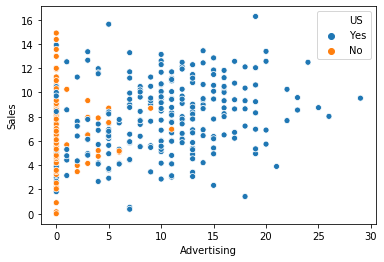

In [6]:
sns.scatterplot(x='Advertising',y='Sales',hue='US',data=cd)

In [7]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


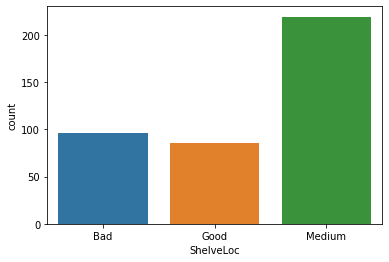

In [8]:
sns.countplot(x='ShelveLoc',data=cd,)

In [9]:
cd.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [11]:
# Creating a new column as per the problem statement. 
# Segregating the values into "High Sales" or "Low Sales".

cd['New_sales'] = '<9'
cd.loc[cd['Sales'] >= 9,'New_sales'] = 'High Sales'
cd.loc[cd['Sales'] < 9,'New_sales'] = 'Low Sales'

In [12]:
cd['New_sales'].value_counts()

Low Sales     286
High Sales    114
Name: New_sales, dtype: int64

In [13]:
# we will drop the 'sales column'.
cd.drop(labels='Sales',axis=1,inplace=True)


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
Lbe = LabelEncoder()

In [16]:
for column_name in cd.columns:
    if cd[column_name].dtype == 'object':
        cd[column_name]=Lbe.fit_transform(cd[column_name])
    else:
        pass
    
        

In [17]:
cd.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,New_sales
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [45]:
column_name = cd.columns
column_name

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'New_sales'],
      dtype='object')

In [48]:
predictors = column_name[0:10]
predictors

Target = column_name[10]
Target

'New_sales'

In [19]:
# split the data into X and Y

X = cd.iloc[:,0:9]
X
Y = cd.iloc[:,9]
Y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: US, Length: 400, dtype: int32

In [20]:
# split the data to train and test.

from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [22]:
# model fitting and prediction.

from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier(n_jobs=4,oob_score=True,n_estimators=100,criterion="entropy")

In [24]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [25]:
rf.classes_

array([0, 1])

In [26]:
rf.n_features_

9

In [27]:
rf.oob_score_

0.9107142857142857

In [28]:
rf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=602421999, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1459723877, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_dept

In [29]:
# Training accuracy

X_pred_train = rf.predict(X_train)
X_pred_train

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0])

In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [31]:
conf_mat = confusion_matrix(X_pred_train,y_train)

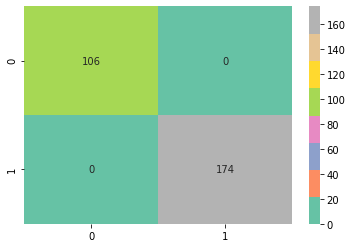

In [32]:
sns.heatmap(conf_mat,cmap='Set2',annot=True,fmt='.3g')

In [33]:
pd.crosstab(X_pred_train,y_train)

US,0,1
row_0,,
0,106,0
1,0,174


In [34]:
Train_accuracy = accuracy_score(X_pred_train,y_train)*100
print('Accuracy :', Train_accuracy, '%')

Accuracy : 100.0 %


In [35]:
# Test Accuracy

X_pred_test = rf.predict(X_test)
X_pred_test

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [36]:
conf_mat_test = confusion_matrix(X_pred_test,y_test)
conf_mat_test

array([[31,  7],
       [ 5, 77]], dtype=int64)

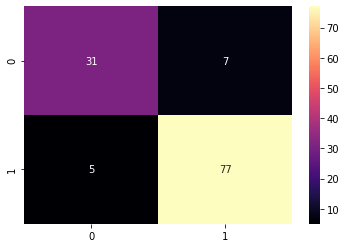

In [37]:
sns.heatmap(conf_mat_test,cmap='magma',annot=True,fmt='.3g')

In [38]:
pd.crosstab(X_pred_test,y_test)

US,0,1
row_0,,
0,31,7
1,5,77


In [39]:
Test_accuracy = accuracy_score(X_pred_test,y_test)*100
print('Accuracy :', Test_accuracy, '%')

Accuracy : 90.0 %


In [50]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO

tree = rf.estimators_[5]
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors[0:9] ,class_names = Target ,impurity =False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Creating pdf and png file the selected decision tree
graph.write_pdf('Companyrf.pdf')
graph.write_png('Companyrf.png')